# Introduction

In this project, we have a given database of 10k+ movies which contains data such as title, cast, director, runtime, budget, revenue, release year etc. I have conducted my own data analysis and brainstormed what questions can be answered with the data given. I have used Pandas, Numpy, Matplotlib and Seaborn libraries to answer the questions. Finally after looking all the answer i have given my conclusions.

# Setting up Environment

In [1]:
#Adding important libraries
import pandas as pd
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Reading csv file using pandas
DataFrame = pd.read_csv('tmdb-movies.csv')
#Printing DataFrame
DataFrame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

One thing i noticed about this dataset is that vote_count and vote_average behave differently .More vote_count doesn't implies highest rating which means that vote_count include postive and negative votes.

## Questions to be Answered

Which movie earns the most and least profit?

How many number of movies released per year?

What is Average duration of movies?

What is Average Budget?

What is Average revenue?

What is Average profits?

Which movie had the greatest and least runtime?

Which movie had the greatest and least budget?

Which movie had the greatest and least revenue?

In Which month released highest number of movies?

Which director directed most films?

Whcih cast has appeared the most?

Which genre were more successful?

what is effect of budget and revenue on vote_average?

# Data Wrangling

In [3]:
#Creating a Series with values True and False. if Budget is zero then value wil be True
data2=pd.Series(DataFrame['budget']==0)
#Counting Values i.e. number of true or false
WB=data2.value_counts()
print("NUMBER OF MOVIES WITHOUT ANY BUDGET DATA")
print(WB[1])

print('\n')
#Creating a Series with values True and False. if revenue is zero then value wil be True
data3=pd.Series(DataFrame['revenue']==0)
#Counting Values i.e. number of true or false
WR=data3.value_counts()
print("NUMBER OF MOVIES WITHOUT ANY REVENUE DATA")
print(WR[1])

NUMBER OF MOVIES WITHOUT ANY BUDGET DATA
5696


NUMBER OF MOVIES WITHOUT ANY REVENUE DATA
6016


As you can see in this database of movies there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded.So we have to Clean it for better investigation

In [4]:
#Creating a Series with values True and False. if runtime is zero then value wil be True
data4=pd.Series(DataFrame['runtime']==0)
#Counting Values i.e. number of true or false
r=data4.value_counts()
print(r[1])

31


There are some movies with Runtime equals to zero so we have to fix it

In [5]:
data5=pd.Series(DataFrame.duplicated())
duplicate=data5.value_counts()
print(duplicate[1])

1


There is one duplicate entry in dataset.So we have to remove it 

### Data Cleaning

There are ssome columns in dataset which are irrelevent to my investigation  like imdb_id,tagline,overview,budget_adj,revenue,adj,keywords. I will remove all these columns from our dataset

In [6]:
#creating list of column names
delete_col=['imdb_id','tagline','overview','budget_adj','revenue_adj','keywords']
#use drop command to delete the given table,axis=1 because we have to remove full column
movie_data = DataFrame.drop(delete_col,1)
#print first three entries
movie_data.head(3)

,id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


Now lets delete duplicate rows

In [7]:
#Removing Duplicate entry, keep='first' because we want to keep first entry and delete all next duplicate entires
movie_data.drop_duplicates(keep='first',inplace=True)

In [8]:
#get number of rows and column using .shape
rows, col = movie_data.shape
print('We now have {} total entries of movies and {} columns/features of it.'.format(rows-1, col))

We now have 10864 total entries of movies and 15 columns/features of it.


Removing Movies with 0 Budget and Revenue

In [9]:
#Creating list of column budget and revenue 
toremove=['budget','revenue']
#Replacing all the zero's in budget and revenue column with NaN
movie_data[toremove]=movie_data[toremove].replace(0,np.NaN)
#Using dropna to remove rows containing NaN as entry
movie_data.dropna(subset=toremove,inplace=True)

Now Replacing runtime 0 with Nan

In [10]:
#Replacing all the zero's in runtime column with NaN
movie_data['runtime']=movie_data['runtime'].replace(0,np.NaN)
#we did this because this will not effect the average value of runtime.Python will not consider NaN value during calculating mean

In [11]:
rows, col = movie_data.shape
print('We now have {} total entries of movies and {} columns/features of it.'.format(rows-1, col))

We now have 3853 total entries of movies and 15 columns/features of it.


# Investigating number of movies released per year

In [12]:
#Creating numpy array of release_year column
release=np.array(movie_data['release_year'])
#using np.unique getting year and corresponding number of repetition
YEAR,COUNT = np.unique(release,return_counts=True)
#creating series of year and count
ANSWER = pd.Series(COUNT,index=YEAR)
ANSWER

1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     57
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    127
2003    121
2004    147
2005    163
2006    169
2007    165
2008    167
2009    174
2010    178
2011    199
2012    158
2013    180
2014    165
2015    160
dtype: int64

Text(0.5,1,'Number of movies released per year')

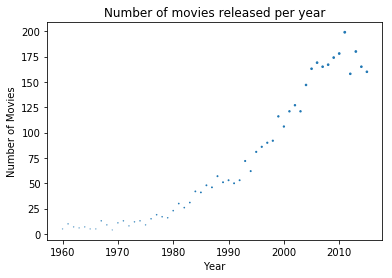

In [13]:
#Creating a scale value which can control the boldness of dots in graph
scale=COUNT/COUNT.std()
#Create scatter graph with Year as x axis and Count as y axis
plt.scatter(YEAR,COUNT,s=scale)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of movies released per year')

Above data shows number of movies Released per year.As we can see graph rises exponentially after 2000 so most of the movies are released after year 2000 

# Investigating Movie Profit

In [15]:
#Inserting new Column Profit in dataset
movie_data.insert(4,'Profit',movie_data['revenue']-movie_data['budget'])
#print first 4 entries of dataset
movie_data.head(4)

,id,popularity,budget,revenue,Profit,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015


In [24]:
pro=movie_data.groupby('release_year',as_index=False)['Profit'].sum()
pro

,release_year,Profit
0,1960,1.081981e+08
1,1961,2.990832e+08
2,1962,1.668798e+08
3,1963,1.154119e+08
4,1964,2.946784e+08
5,1965,3.992819e+08
6,1966,5.246869e+07
7,1967,6.363346e+08
8,1968,1.682718e+08
9,1969,2.068630e+08


Text(0.5,1,'Total Profit per year')

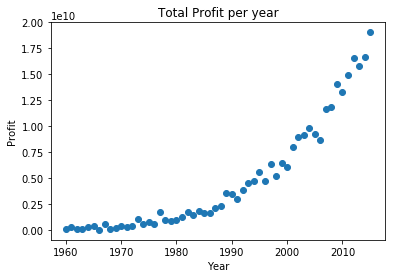

In [29]:
#plotting simple graph using release_year column as x axis and Profit as y axis
plt.scatter(pro['release_year'],pro['Profit'])
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Total Profit per year')

By looking at this graph we can say that total profit of every release in a year increases.Lets investigate further

### Movie with Highest Profit

In [17]:
#Find id of highest value in Profit column
highest = movie_data['Profit'].idxmax
#Create DataFrame highest value
Highest_Profit = pd.DataFrame(movie_data.loc[highest])
Highest_Profit

,1386
id,19995
popularity,9.43277
budget,2.37e+08
revenue,2.78151e+09
Profit,2.54451e+09
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage,http://www.avatarmovie.com/
director,James Cameron
runtime,162


### Movie with Lowest Profit

In [18]:
#Find id of lowest value in Profit column
Lowest=movie_data['Profit'].idxmin()
#Create DataFrame lowest value
Lowest_Profit=pd.DataFrame(movie_data.loc[Lowest])
Lowest_Profit

,2244
id,46528
popularity,0.25054
budget,4.25e+08
revenue,1.10876e+07
Profit,-4.13912e+08
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.iamrogue.com/thewarriorsway
director,Sngmoo Lee
runtime,100


# Investigating Some General Questions

### Average budget

In [19]:
#calculate average budget value using mean() function of pandas
avg_budget=movie_data['budget'].mean()
print(avg_budget)

37203696.954852104


### Average Runtime

In [20]:
#calculate average runtime value using mean() function of pandas
avg_runtime=movie_data['runtime'].mean()
print(avg_runtime)

109.22029060716139


### Average Revenue

In [21]:
#calculate average revenue value using mean() function of pandas
avg_reve=movie_data['revenue'].mean()
print(avg_reve)

107686616.09807992


### Average Profit

In [22]:
#calculate average Profit value using mean() function of pandas
avg_prof=movie_data['Profit'].mean()
print(avg_prof)

70482919.14322782


### Movie with longest Runtime and Shortest Runtime

In [23]:
#Find id of highest value in Profit column
h=movie_data['runtime'].idxmax()
#DataFrame of highest value
LR=pd.DataFrame(movie_data.loc[h])
#Find id of lowest value in Profit column
l=movie_data['runtime'].idxmin()
#DataFrame of lowest value
SR=pd.DataFrame(movie_data.loc[l])
#Concatenating two dataFrames
dataf=pd.concat([LR,SR],axis=1)
dataf

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,1.8e+07,10
revenue,871279,5
Profit,-1.71287e+07,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
homepage,NaN,NaN
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15


### Movie with Max and Min Budget

In [24]:
#Find id of highest value in Profit column
h=movie_data['budget'].idxmax()
#DataFrame of highest value
LR=pd.DataFrame(movie_data.loc[h])
#Find id of lowest value in Profit column
l=movie_data['budget'].idxmin()
#DataFrame of lowest value
SR=pd.DataFrame(movie_data.loc[l])
#Concatenating two dataFrames
dataf=pd.concat([LR,SR],axis=1)
dataf

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
Profit,-4.13912e+08,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
homepage,http://www.iamrogue.com/thewarriorsway,NaN
director,Sngmoo Lee,Jeff Pollack
runtime,100,95


### Movie with Max and Min Revenue

In [25]:
#Find id of highest value in Profit column
h=movie_data['revenue'].idxmax()
#DataFrame of highest value
LR=pd.DataFrame(movie_data.loc[h])
#Find id of lowest value in Profit column
l=movie_data['revenue'].idxmin()
#DataFrame of lowest value
SR=pd.DataFrame(movie_data.loc[l])
#Concatenating two dataFrames
dataf=pd.concat([LR,SR],axis=1)
dataf

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
Profit,2.54451e+09,-6e+06
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Billy Ray
runtime,162,94


# Investigating In Which month released highest number of movies

      0
1   225
10  363
11  304
12  415
2   257
3   279
4   267
5   291
6   340
7   316
8   337
9   460


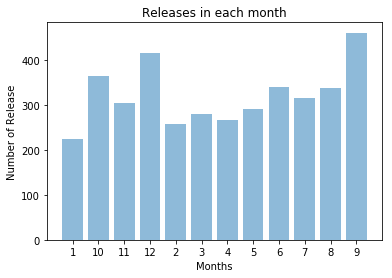

In [30]:
relese_month=[]
for date in movie_data['release_date']:
    relese_month.append(date.split('/')[0])
#creating numpy array of months with repetition 
release_month=np.array(relese_month)
#Using unique to get count of each month
Month,count=np.unique(release_month,return_counts=True)
#Creating DataFrame of above values
mu=pd.DataFrame(count,Month)
print(mu)
y_pos = np.arange(len(Month))
#plotting a bar graph
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, Month)
plt.ylabel('Number of Release')
plt.xlabel('Months')
plt.title('Releases in each month')
plt.show()

So from above data we can say that most of the movies are released in 9th month

In [31]:
#since we have multiple questions answers being similar in logic and code, we will give function which will make our life easier

#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = movie_data[column_name].str.cat(sep = '|')
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)    
    return count

# Which directer directed most films?

In [32]:
#Series contain name of all directors with repetition
data1=pd.Series(movie_data['director'])
#this will count the repeated values
count1=data1.value_counts(ascending=False)
count1.head()

Steven Spielberg    27
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Martin Scorsese     17
Name: director, dtype: int64

#### Steven Spielberg directed most films

# Whcih cast has appeared the most?

In [33]:
#get count of cast
director_count = extract_data('cast')
director_count.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

#### Robert De Niro appeared in most movies

# Which genre were more successful?

In [34]:
#get count of genres
director_count = extract_data('genres')
director_count.head()

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

In this data i am assuming that the genre having highest number of repetition tends to be more successful 

#### Drama is more successful

# Effect of budget and revenue on vote_average

In [35]:
#grouping data with vote_average
effect=movie_data.groupby('vote_average',as_index=False)[['budget','revenue']].sum()
effect

,vote_average,budget,revenue
0,2.2,6.500000e+07,7.370600e+04
1,3.3,7.060000e+07,3.301944e+07
2,3.4,2.700000e+07,1.006837e+08
3,3.5,4.200000e+07,2.007619e+07
4,3.6,2.600000e+07,5.936277e+07
5,3.7,3.800000e+07,5.204418e+07
6,3.8,1.410000e+08,9.879099e+07
7,3.9,1.061000e+08,1.667956e+08
8,4.0,2.980000e+08,1.945458e+08
9,4.1,1.500000e+08,1.360307e+08


To Find effect of budget and revenue on Rating or vote average. we have to calculate a ratio of revenue to budget

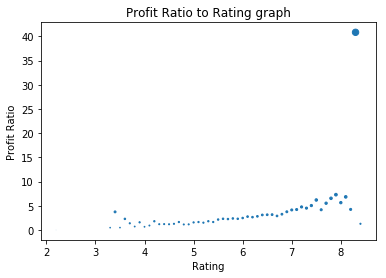

In [36]:
#calculating ratio
ProfitRatio=effect['revenue']/effect['budget']
ProfitRatio
#Plotting scatter graph
plt.scatter(effect['vote_average'],ProfitRatio,s=ProfitRatio)
plt.xlabel('Rating')
plt.ylabel('Profit Ratio')
plt.title('Profit Ratio to Rating graph')
plt.show()

By Looking at this scatter plot we can't conclude anything for sure.This is because some movies with low ProfitRatio have High rating which means that movies with less profit can also have rating and some movie with high profit have low rating. But we can say that profit of movies increases constantly in rating between 5 to 7

# Conclusion

According to my analysis if i wanted to make a profitable movie 
  i would choose Robert De Niro and Bruce Willis as my starcast
  Genre would be Drama 
  Director would be Steven Spielberg
  Runtime would be around 150
  and Release month of movie would be September

 **Limitation**-I want to make it clear, it's not 100 percent guaranteed that this solution gonna work everytime.This is because that this data is small and old for making any perfect prediction